## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_curve,auc,confusion_matrix
import copy

## Load the data

In [ ]:
Data_train=pd.read_excel(r'/content/drive/MyDrive/DAL dataset/Assignment 6/pulsar_data_train.xlsx')

In [ ]:
Data_train.info()# overall information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [ ]:
# The columns have leading white space so removing them
Data_train.columns = Data_train.columns.str.strip()

## Get the columns having missing entries

In [ ]:
Missing=Data_train.isna().any().values
Missing_cols=Data_train.columns[Missing]
Missing_cols#These are the columns with missing entries

Index(['Excess kurtosis of the integrated profile',
       'Standard deviation of the DM-SNR curve',
       'Skewness of the DM-SNR curve'],
      dtype='object')

In [ ]:
Data_train['target_class'].value_counts()# So its a binary classifier

0    11375
1     1153
Name: target_class, dtype: int64

In [ ]:
Data_train.describe()# Statistical details of the data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [ ]:
"""sns.pairplot(Data_train,hue='target_class')"""# Get the pair plot to understand mutual relationships among features

"sns.pairplot(Data_train,hue='target_class')"

In [ ]:
sns.set()
def Plot_dist(data):
  """
  Give a DataFrame
  """
  data=copy.deepcopy(data)
  Columns=data.columns
  data[Columns[-1]].replace(0,'Non_pulsar_star',inplace=True)
  data[Columns[-1]].replace(1,'pulsar_star',inplace=True)
  for col in Columns:
    plt.title(col,fontsize=15)
    sns.histplot(data, x=col, hue=Columns[-1], kde=True)
    plt.show()

In [ ]:
sns.set()
def Plot_kde(data):
  """
  Give a DataFrame
  """
  Columns=data.columns
  for col in Columns:
    plt.title(f'{col} (test set)',fontsize=15)
    sns.kdeplot(data, x=col, hue=Columns[-1],fill=True)
    plt.show()

In [ ]:
def Correlation_plot(Data):
  cor=Data.corr()
  plt.figure(figsize=(10,8))
  sns.heatmap(cor,annot=True)
  plt.title("Heat map for correlation",fontsize=15)
  plt.show()

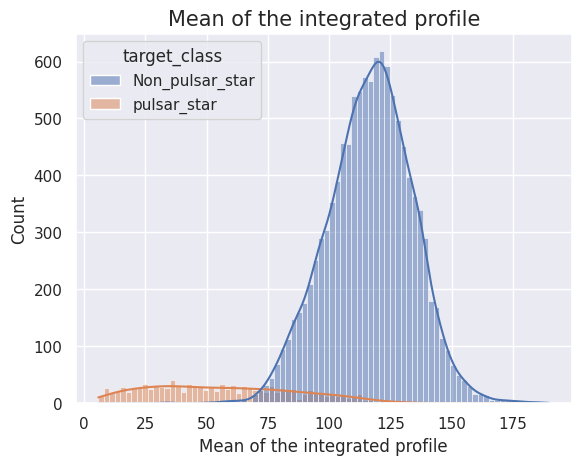

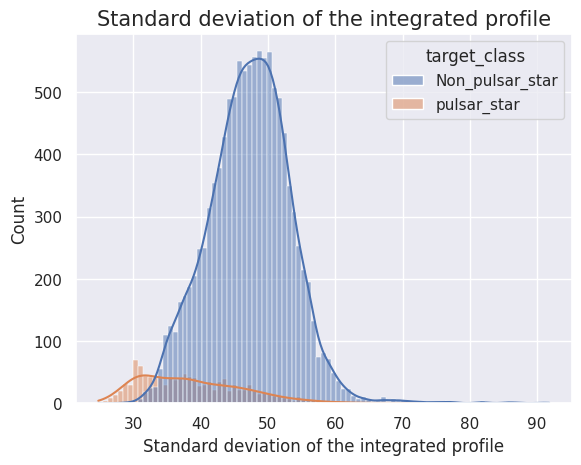

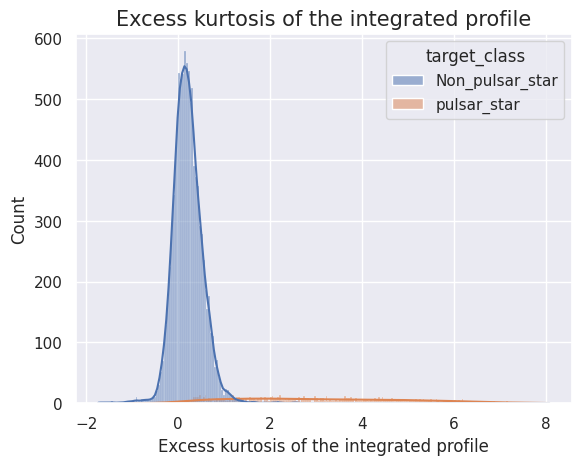

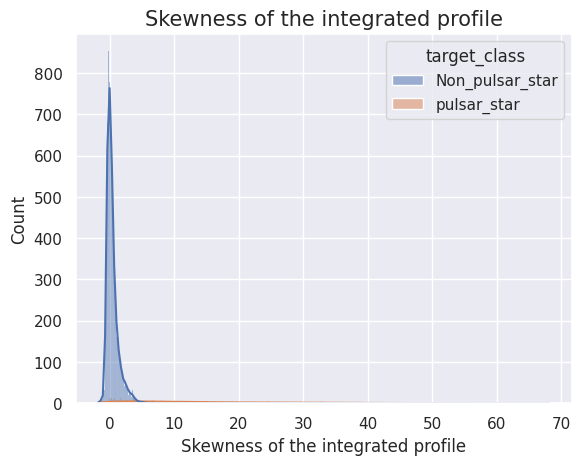

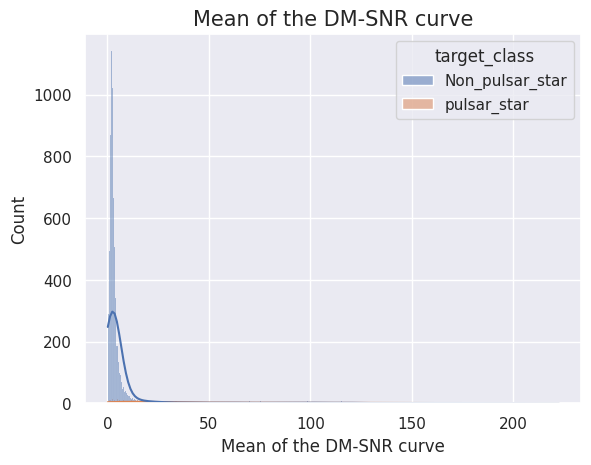

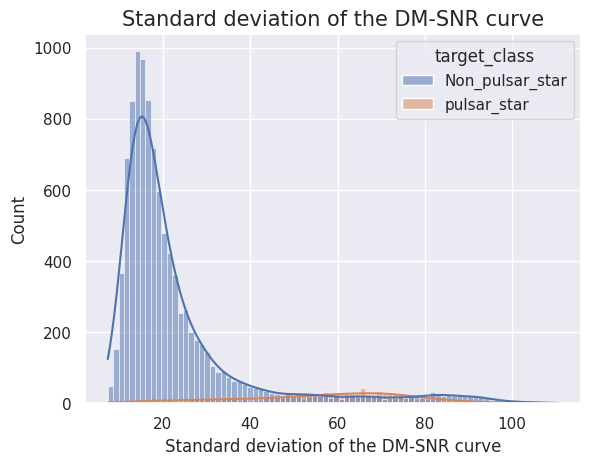

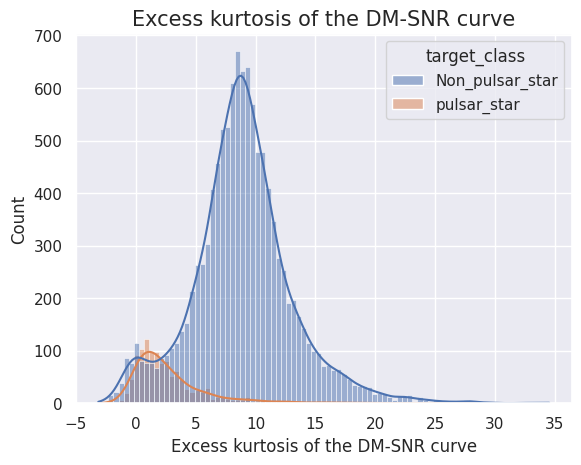

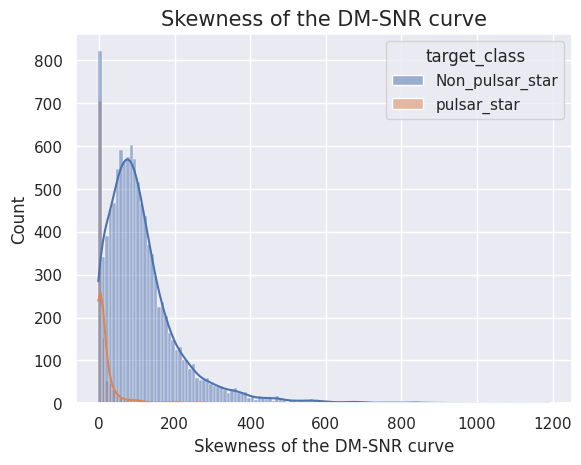

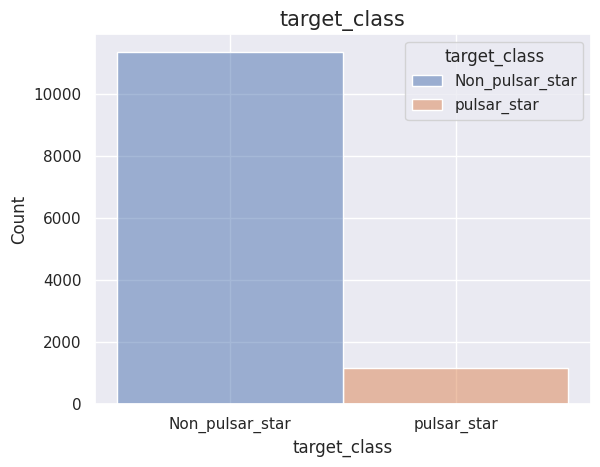

In [ ]:
Plot_dist(Data_train)

**From the above plots it is clear most of the features are skewed in nature and the target column is highly imbalanced**

In [ ]:
# All the three missing entry columns have skewed distribution
# For skewed data median should be used for imputation
# We will perform KNN imputation

In [ ]:
# Drop the target column and columns with missing entries
Target=Data_train.pop('target_class')

In [ ]:
Knn = KNNImputer()
X=Knn.fit_transform(Data_train)

In [ ]:
New_data=pd.DataFrame(X,columns=Data_train.columns)

In [ ]:
New_data['Target']=Target

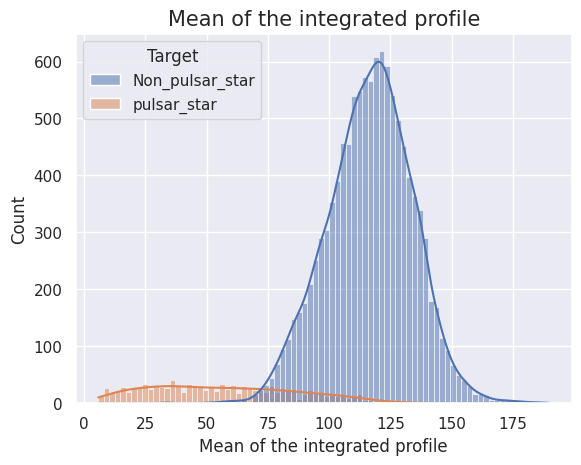

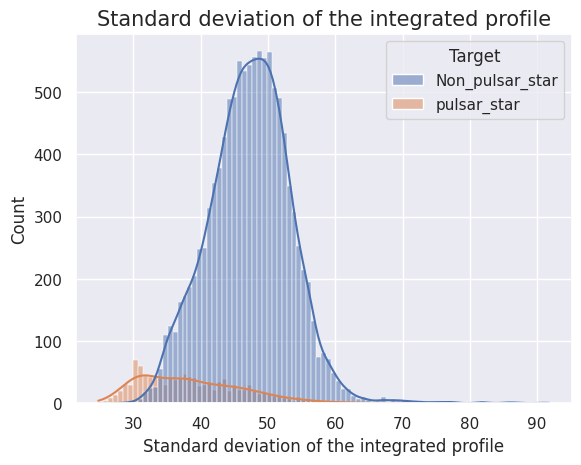

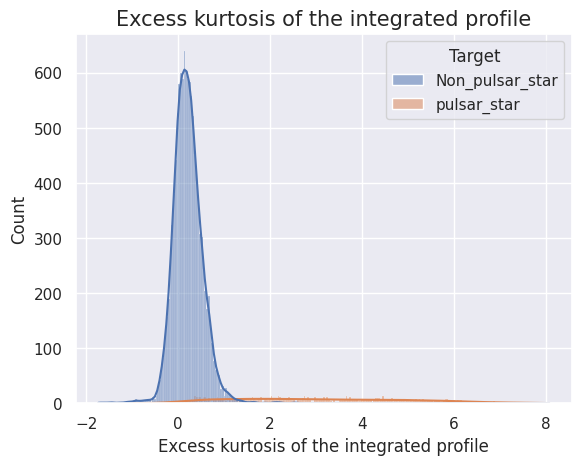

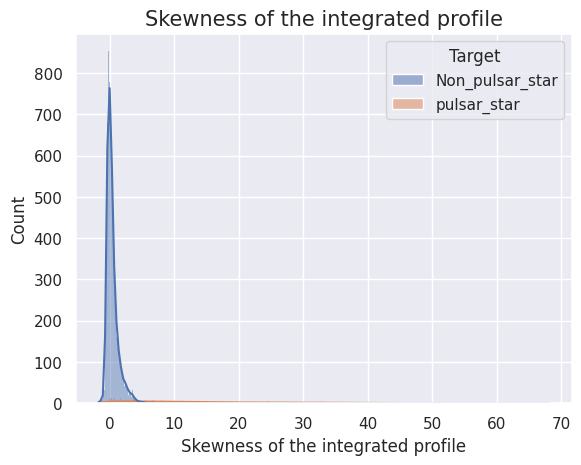

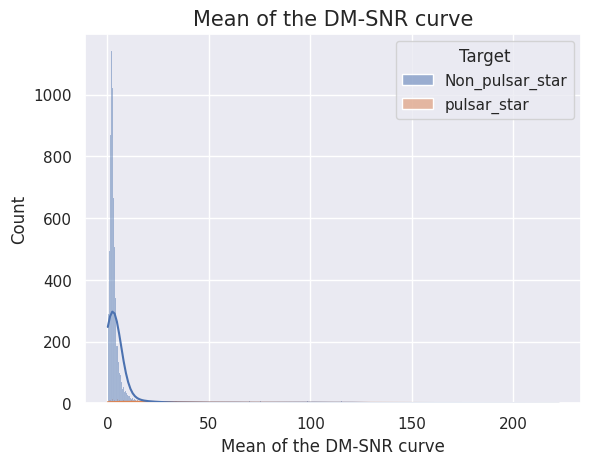

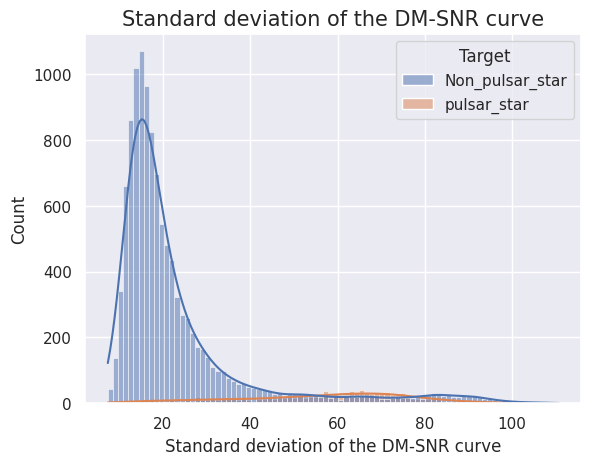

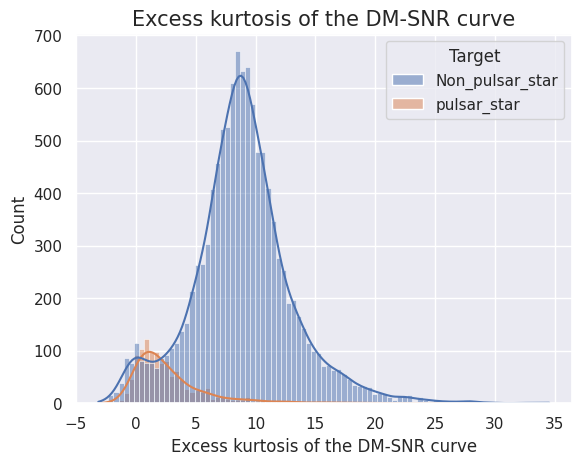

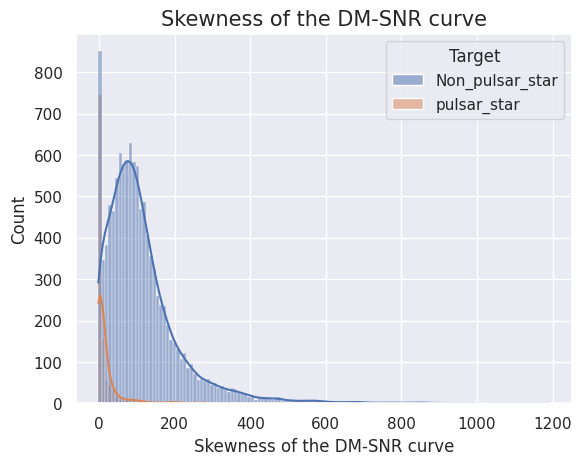

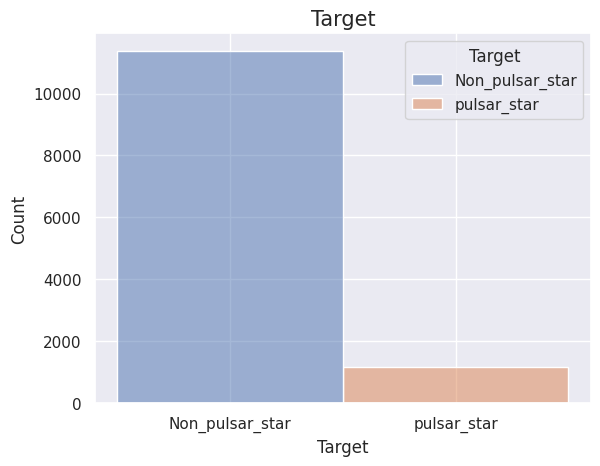

In [ ]:
Plot_dist(New_data)# Recheck the distribution after imputation

In [ ]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                12528 non-null  float64
 1   Standard deviation of the integrated profile  12528 non-null  float64
 2   Excess kurtosis of the integrated profile     12528 non-null  float64
 3   Skewness of the integrated profile            12528 non-null  float64
 4   Mean of the DM-SNR curve                      12528 non-null  float64
 5   Standard deviation of the DM-SNR curve        12528 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7   Skewness of the DM-SNR curve                  12528 non-null  float64
 8   Target                                        12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


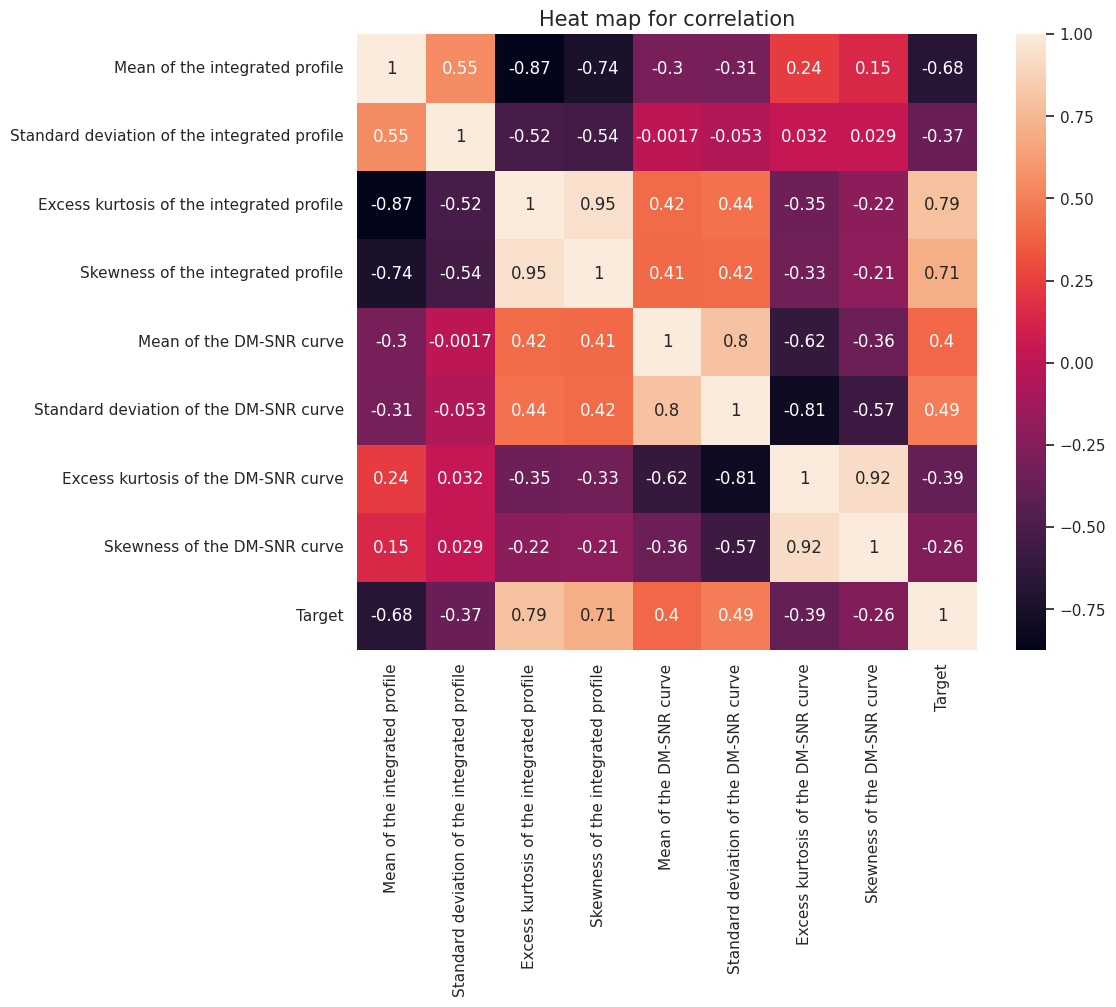

In [ ]:
Correlation_plot(New_data)

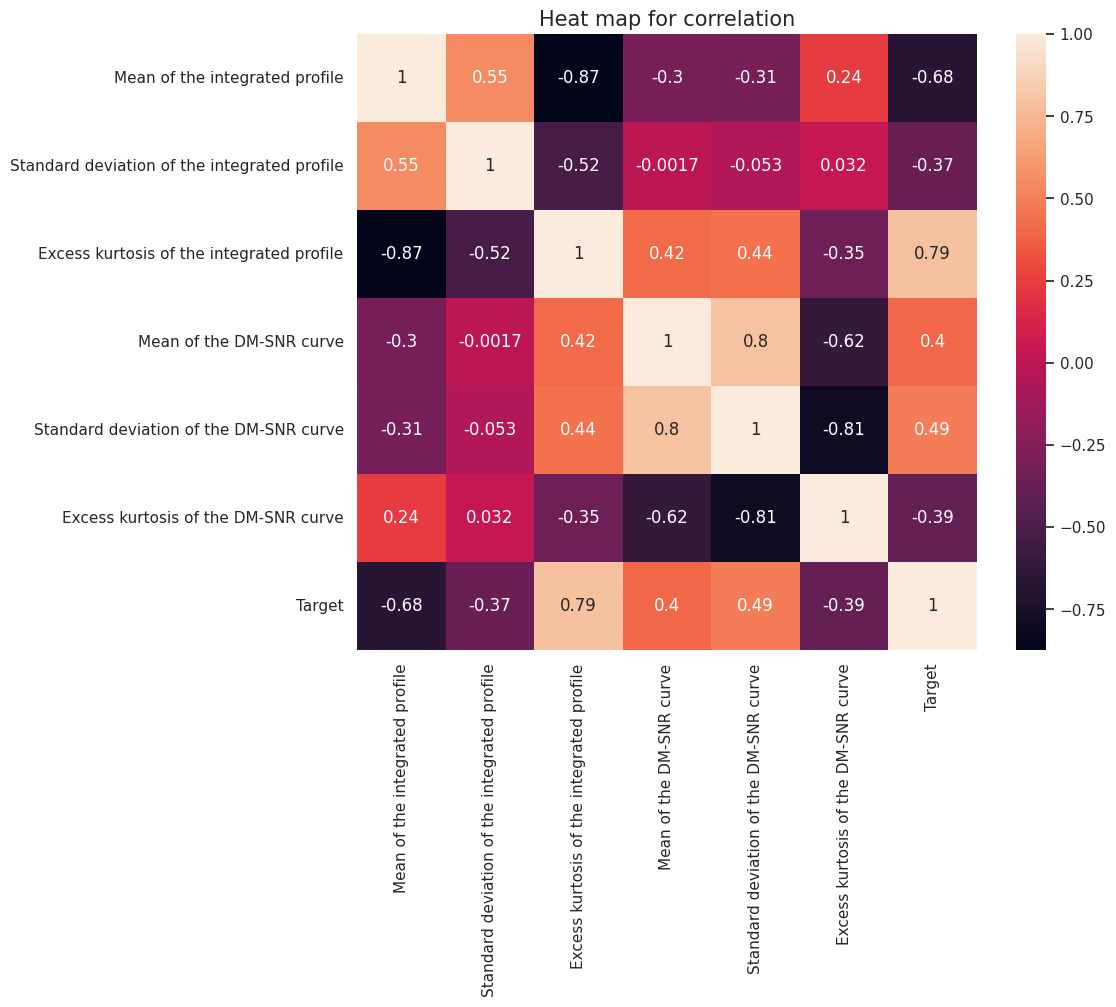

In [ ]:
#Drop the features having correlation coefficient >0.9
cols_to_drop=['Skewness of the integrated profile','Skewness of the DM-SNR curve']
New_data=New_data.drop(cols_to_drop,axis=1)
Correlation_plot(New_data)

## Training the data

In [ ]:
Y=New_data.pop('Target')
clf=SVC(kernel='linear',C=1e3)
clf.fit(New_data,Y)

SVC(C=1000.0, kernel='linear')

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([11375,  1153]))

In [ ]:
print(classification_report(Y,clf.predict(New_data)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11375
           1       0.94      0.81      0.87      1153

    accuracy                           0.98     12528
   macro avg       0.96      0.90      0.93     12528
weighted avg       0.98      0.98      0.98     12528



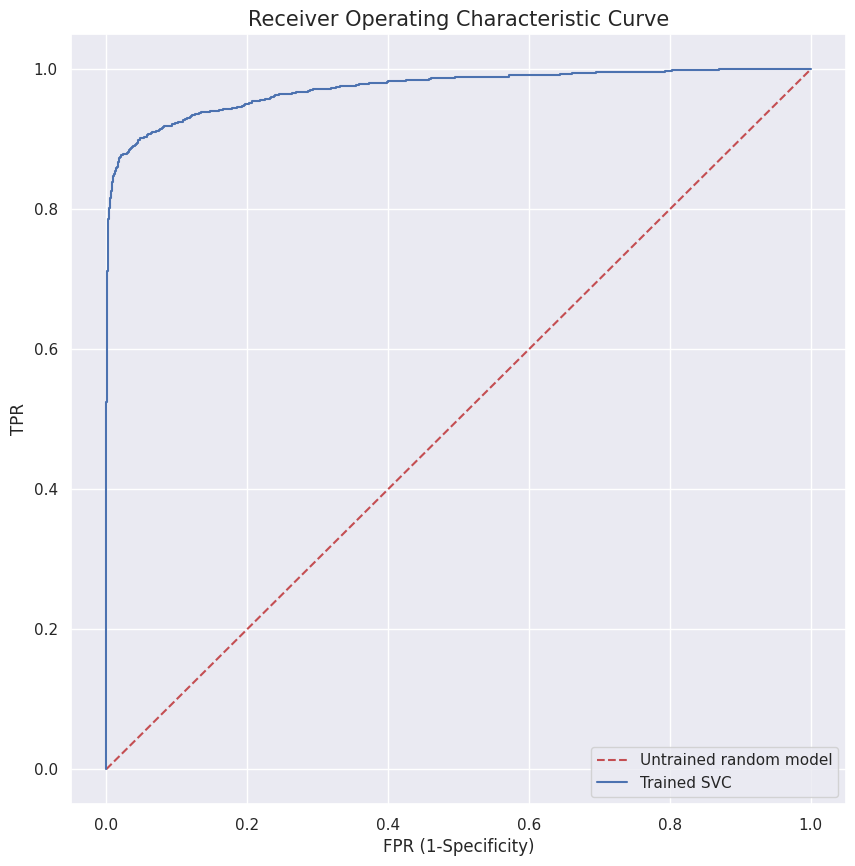

In [ ]:
Y_test_proba=clf.decision_function(New_data)
fpr, tpr, thresholds = roc_curve(Y, Y_test_proba)
sns.set()
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--',label='Untrained random model')
plt.plot(fpr,tpr,label='Trained SVC')
plt.title("Receiver Operating Characteristic Curve",fontsize=15)
plt.ylabel("TPR")
plt.xlabel("FPR (1-Specificity)")
plt.legend()
plt.show()

In [ ]:
auc(fpr,tpr)# AUC score

0.9727577747491019

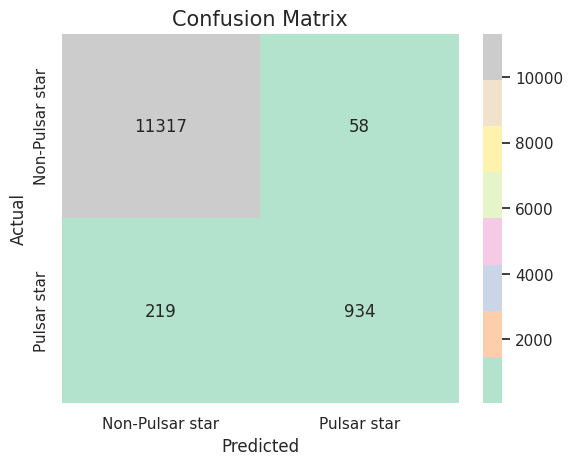

In [ ]:
cm=confusion_matrix(Y,clf.predict(New_data))
plt.title("Confusion Matrix",fontsize=15)
sns.heatmap(cm,annot=True,cmap='Pastel2',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5,1.5],labels=['Non-Pulsar star','Pulsar star'])
plt.yticks(ticks=[0.5,1.5],labels=['Non-Pulsar star','Pulsar star'])
plt.show()

## Load the test set

In [ ]:
Data_test=pd.read_excel(r'/content/drive/MyDrive/DAL dataset/Assignment 6/pulsar_data_test.xlsx')
Data_test.columns = Data_test.columns.str.strip()

In [ ]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                5370 non-null   float64
 1   Standard deviation of the integrated profile  5370 non-null   float64
 2   Excess kurtosis of the integrated profile     4603 non-null   float64
 3   Skewness of the integrated profile            5370 non-null   float64
 4   Mean of the DM-SNR curve                      5370 non-null   float64
 5   Standard deviation of the DM-SNR curve        4846 non-null   float64
 6   Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7   Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                  0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [ ]:
Data_test=Data_test.drop(['target_class'],axis=1)

In [ ]:
X_test=Knn.transform(Data_test)
New_data_test=pd.DataFrame(X_test,columns=Data_test.columns)

## Visualization on the test set

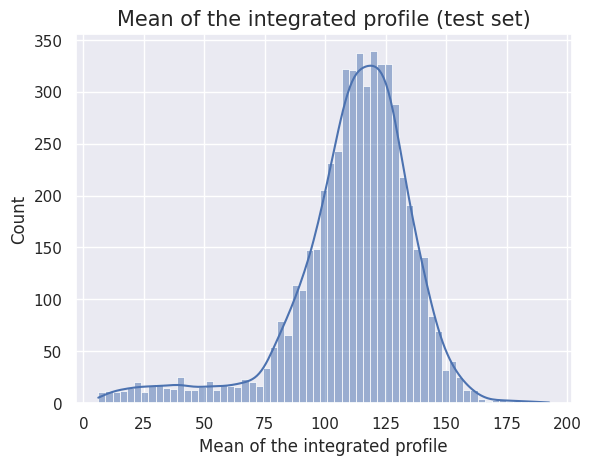

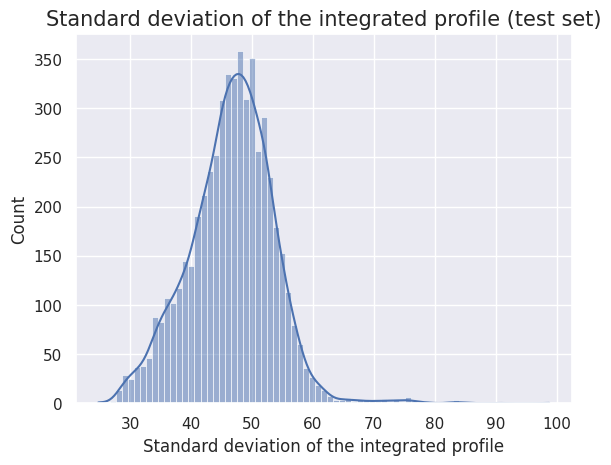

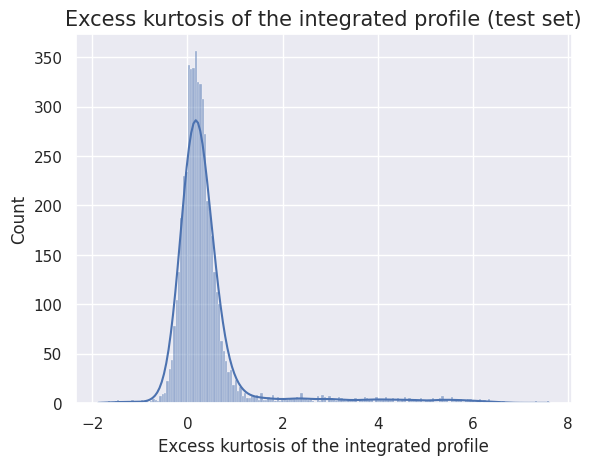

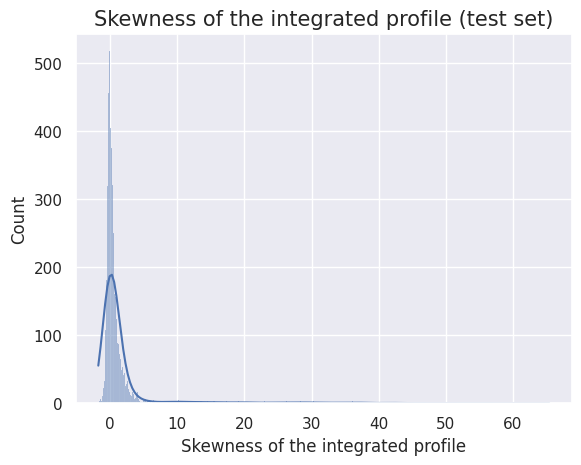

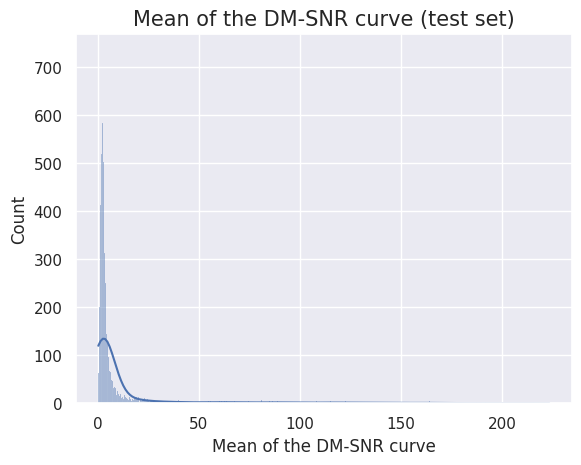

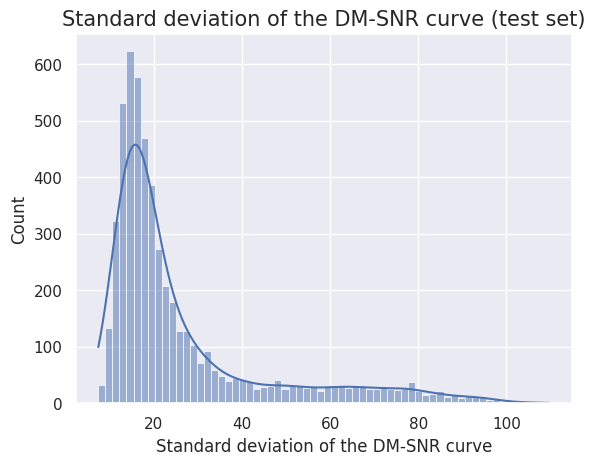

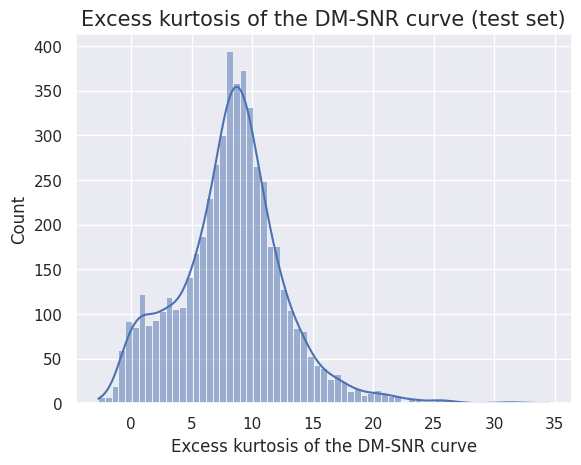

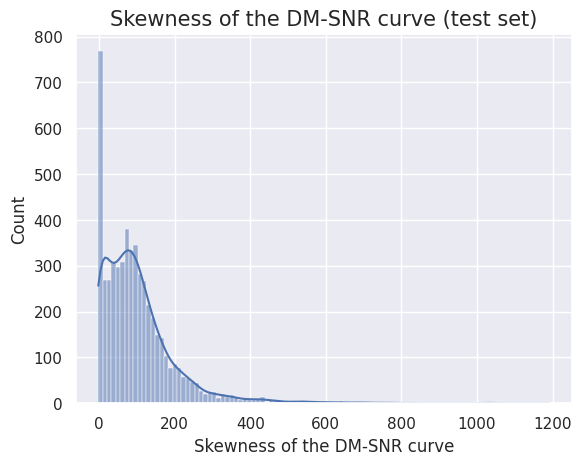

In [ ]:
Columns=New_data_test.columns
for col in Columns:
  plt.title(col+' (test set)',fontsize=15)
  sns.histplot(New_data_test,x=col,kde=True)
  plt.show()

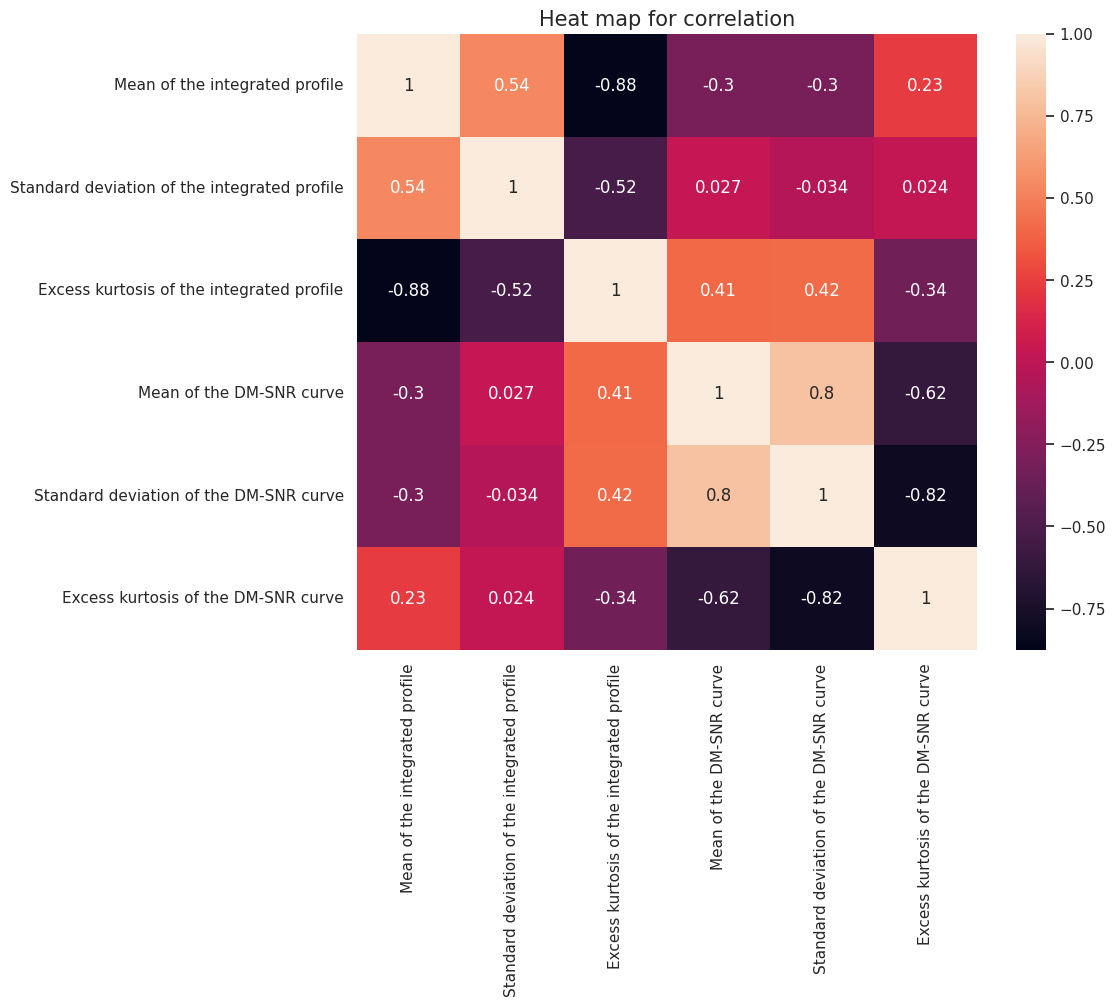

In [ ]:
# Drop the correlated features
New_data_test=New_data_test.drop(cols_to_drop,axis=1)
Correlation_plot(New_data_test)

In [ ]:
Yhat_test=clf.predict(New_data_test)

In [ ]:
np.unique(Yhat_test,return_counts=True)

(array([0, 1]), array([4961,  409]))

In [ ]:
New_data_test['Predicted_target']=Yhat_test

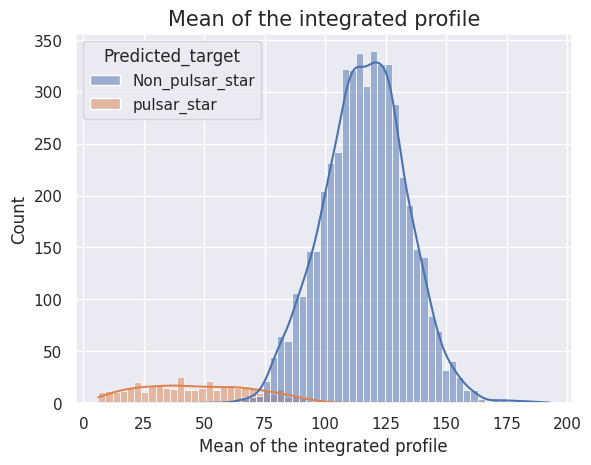

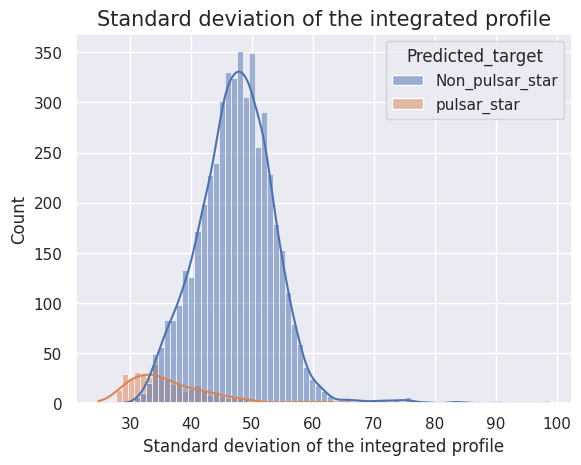

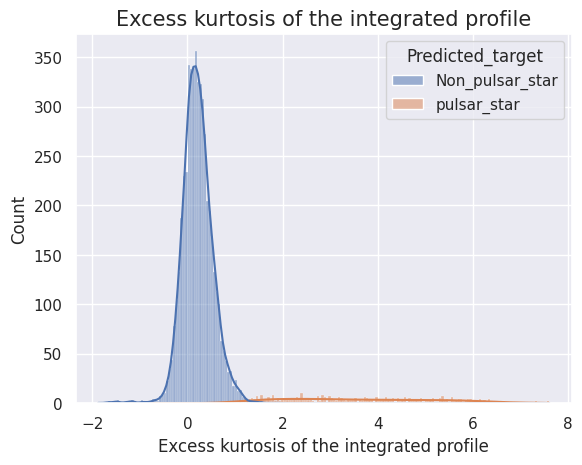

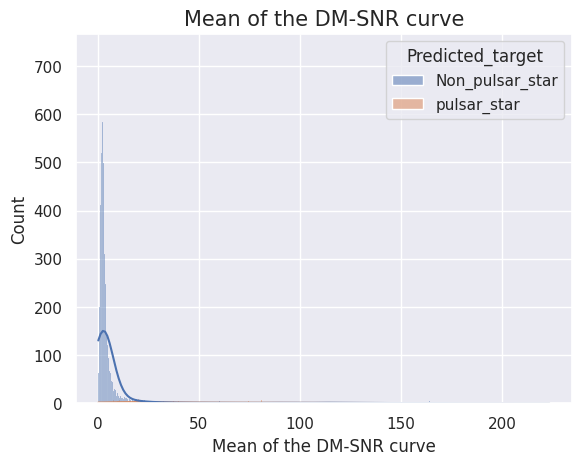

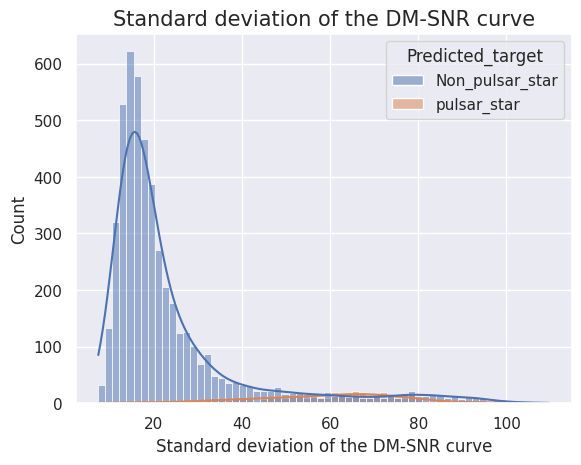

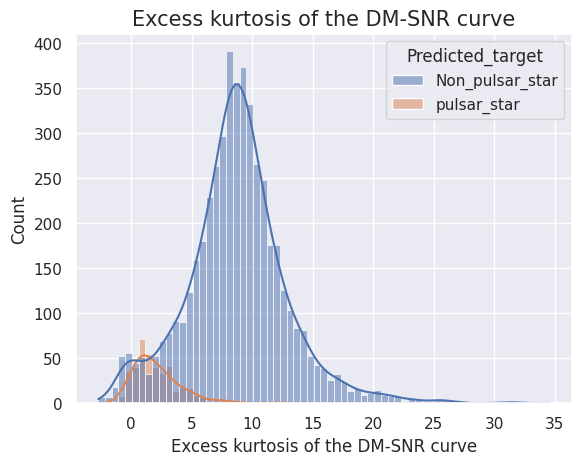

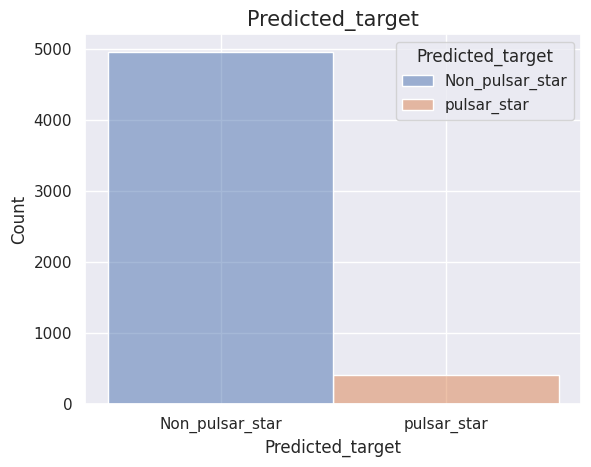

In [ ]:
Plot_dist(New_data_test)

## End of the code